# Tel Aviv Stock Exchange
* Scrape historical data

In [1]:
import pandas as pd
import time
import os
from pathlib import Path

from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#params
data_dir = Path.cwd() / 'data'
data_dir.mkdir(exist_ok=True)
file_history = data_dir / 'securityHistoryInDayData.csv'

In [3]:
def clean_history():
    '''
    removes tmp downloaded file
    '''
    
    if os.path.exists(file_history):
        os.remove(file_history)    

# Static
* Defined dict of symbols

In [4]:
#symbol to tick
symbols = {
    #TA-35
    'HRL.TA-35' : 1, #Harel Sal (4A) TA 35
    'KSM.TA-35' : 10, #KSM ETF (4A) TA-35
    'MTF.TA-35' : 1, #MTF SAL (4A) TA-35
    'PSG.TA-35' : 1, #Psagot ETF (4A) TA-35
    'TC.TA35' : 1, #Tachlit SAL (40) TA 35
    
    #TA-125
    'TC.TA125' : 1, #Tachlit SAL (40) TA 125
    'KSM.TA-125' : 10, #KSM ETF (4A) TA-125
    'PSG.TA-125' : 1, #Psagot ETF (4A) TA-125
    'HRL.TA-125' : 1, #Harel Sal (4A) TA 125M
    'MTF.TA-125' : 1, #MTF SAL (4A) TA-125
    
    #stocks
    'TEVA' : 1,
    'NICE' : 10,
    'ICL' : 1,
    'ESLT' : 10,
    'PRGO' : 10
}

#symbol to url
urls = {
    #TA-35    
    'HRL.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1148907/historical_data/inday',
    'KSM.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1146570/historical_data/inday',
    'MTF.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1150184/historical_data/inday',
    'PSG.TA-35' : 'https://www.tase.co.il/en/market_data/etf/1148790/historical_data/inday',
    'TC.TA35' : 'https://www.tase.co.il/en/market_data/etf/1143700/historical_data/inday',
    
    #TA-125
    'TC.TA125' : 'https://www.tase.co.il/en/market_data/etf/1143718/historical_data/inday',
    'KSM.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1146356/historical_data/inday',
    'PSG.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1148808/historical_data/inday',
    'HRL.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1148899/historical_data/inday',
    'MTF.TA-125' : 'https://www.tase.co.il/en/market_data/etf/1150283/historical_data/inday',
    
    #stocks
    'TEVA' : 'https://www.tase.co.il/en/market_data/security/00629014/historical_data/inday',
    'NICE' : 'https://www.tase.co.il/en/market_data/security/00273011/historical_data/inday',
    'ICL' : 'https://www.tase.co.il/en/market_data/security/00281014/historical_data/inday',
    'ESLT' : 'https://www.tase.co.il/en/market_data/security/01081124/historical_data/inday',
    'PRGO' : 'https://www.tase.co.il/en/market_data/security/01130699/historical_data/inday'
}

In [5]:
#init
options = webdriver.ChromeOptions()
prefs = {"download.default_directory": str(data_dir)}
options.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome(options=options)
driver.maximize_window()
wait = WebDriverWait(driver, 10)

url = 'https://www.tase.co.il/en'
driver.get(url)
print('Please log in...')

Please log in...


In [6]:
#run flow
for symbol, tick in symbols.items():
    if not (data_dir / f'{symbol}.csv').exists():
        retry = 3
        done = False
        
        while(not done and retry > 0):
            try:
                retry -= 1
                url = urls[symbol]
                print(symbol, tick, url)
    
                #clean
                clean_history()
    
                #request
                driver.get(url)
                time.sleep(5)
    
                #Download data
                wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'icon-download'))).click()
    
                #CSV
                wait.until(EC.presence_of_element_located((By.LINK_TEXT, 'CSV'))).click()
                time.sleep(5)
    
                #clone
                file_history.rename(data_dir / f'{symbol}.csv')            
                
                #done
                done = True
            except Exception as e:
                print(symbol, 'retry', retry, e)
        
#clean
clean_history()

HRL.TA-35 1 https://www.tase.co.il/en/market_data/etf/1148907/historical_data/inday
KSM.TA-35 10 https://www.tase.co.il/en/market_data/etf/1146570/historical_data/inday
MTF.TA-35 1 https://www.tase.co.il/en/market_data/etf/1150184/historical_data/inday
PSG.TA-35 1 https://www.tase.co.il/en/market_data/etf/1148790/historical_data/inday
TC.TA35 1 https://www.tase.co.il/en/market_data/etf/1143700/historical_data/inday
TC.TA125 1 https://www.tase.co.il/en/market_data/etf/1143718/historical_data/inday
KSM.TA-125 10 https://www.tase.co.il/en/market_data/etf/1146356/historical_data/inday
PSG.TA-125 1 https://www.tase.co.il/en/market_data/etf/1148808/historical_data/inday
HRL.TA-125 1 https://www.tase.co.il/en/market_data/etf/1148899/historical_data/inday
MTF.TA-125 1 https://www.tase.co.il/en/market_data/etf/1150283/historical_data/inday
TEVA 1 https://www.tase.co.il/en/market_data/security/00629014/historical_data/inday
NICE 10 https://www.tase.co.il/en/market_data/security/00273011/historic

# Dynamic
* Top-k by turnover

## Stocks

In [7]:
k = 5

#load
url = 'https://info.tase.co.il/eng/marketdata/stocks/marketdata/Pages/MarketData.aspx'
driver.get(url)
time.sleep(5)

#sort
wait.until(EC.presence_of_element_located((By.ID, 'OverallTurnOverValue DESC'))).click()
time.sleep(5)

#top-k
elements = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//td[@class="DataGridItemReg"]//a[@class="linkInGrid"]')))[:k]

In [8]:
#collect raw data
data = []
for e in elements:
    symbol = e.text
    href = e.get_attribute('href')
    data_href = 'https://www.tase.co.il/en/market_data/security/' + href.split('/')[-1] + '/historical_data/inday'
    print(symbol, data_href)
    data.append([symbol, href, data_href])

LEUMI https://www.tase.co.il/en/market_data/security/00604611/historical_data/inday
POALIM https://www.tase.co.il/en/market_data/security/00662577/historical_data/inday
MIZRAHI TEFAHOT https://www.tase.co.il/en/market_data/security/00695437/historical_data/inday
DISCOUNT https://www.tase.co.il/en/market_data/security/00691212/historical_data/inday
TEVA https://www.tase.co.il/en/market_data/security/00629014/historical_data/inday


## ETF

In [9]:
#load
url = 'https://www.tase.co.il/en/market_data/etfs'
driver.get(url)
time.sleep(5)

#sort
wait.until(EC.presence_of_element_located((By.XPATH, '//button[@aria-label="Sort descending by Turnover (NIS thousands) "]'))).click()
time.sleep(5)

#top-k
elements = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'item-name')))[:k]

In [10]:
#collect raw data
for e in elements:
    symbol = e.text
    href = e.get_attribute('href')
    data_href = 'https://www.tase.co.il/en/market_data/security/' + href.split('/')[-1] + '/historical_data/inday'
    print(symbol, data_href)
    data.append([symbol, href, data_href])

MTF SAL (4D) S&P 500 https://www.tase.co.il/en/market_data/security/1150333/historical_data/inday
Tachlit SAL (4D) NIKKEI 225 https://www.tase.co.il/en/market_data/security/1144419/historical_data/inday
Tachlit SAL (4D) Index World Value U.S.D Hedged https://www.tase.co.il/en/market_data/security/1189596/historical_data/inday
KSM ETF (6D) Leveraged NASDAQ 100 x3 Monthly https://www.tase.co.il/en/market_data/security/1146976/historical_data/inday
KSM ETF (4A) TA-Insurance IL https://www.tase.co.il/en/market_data/security/1146125/historical_data/inday


## Run Flow

In [11]:
#run flow
for d in data:
    symbol = d[0]
    if not (data_dir / f'{symbol}.csv').exists():
        retry = 3
        done = False
        
        while(not done and retry > 0):
            try:    
                retry -= 1
                
                href = d[1]
                data_href = d[2]
                print(symbol, data_href)
    
                #clean
                clean_history()
    
                #go to data
                driver.get(data_href)
                time.sleep(5)
    
                #Download data
                wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'icon-download'))).click()
                
                #CSV
                wait.until(EC.presence_of_element_located((By.LINK_TEXT, 'CSV'))).click()
                time.sleep(5)
    
                #clone
                # shutil.copyfile(file_history, data_dir + symbol + '.csv')
                file_history.rename(data_dir / f'{symbol}.csv')
                #done
                done = True            
            except Exception as e:
                print(symbol, 'retry', retry, e)            
            
#clean
clean_history()

#terminate
driver.quit()

LEUMI https://www.tase.co.il/en/market_data/security/00604611/historical_data/inday
POALIM https://www.tase.co.il/en/market_data/security/00662577/historical_data/inday
MIZRAHI TEFAHOT https://www.tase.co.il/en/market_data/security/00695437/historical_data/inday
DISCOUNT https://www.tase.co.il/en/market_data/security/00691212/historical_data/inday
MTF SAL (4D) S&P 500 https://www.tase.co.il/en/market_data/security/1150333/historical_data/inday
Tachlit SAL (4D) NIKKEI 225 https://www.tase.co.il/en/market_data/security/1144419/historical_data/inday
Tachlit SAL (4D) Index World Value U.S.D Hedged https://www.tase.co.il/en/market_data/security/1189596/historical_data/inday
KSM ETF (6D) Leveraged NASDAQ 100 x3 Monthly https://www.tase.co.il/en/market_data/security/1146976/historical_data/inday
KSM ETF (4A) TA-Insurance IL https://www.tase.co.il/en/market_data/security/1146125/historical_data/inday


# Zoom In

In [12]:
def load_data(symbol):
    df = pd.read_csv(data_dir / f'{symbol}.csv', skiprows=2).dropna()
    df['Time'] = pd.to_datetime(df['Time'])
    df = df.sort_values(by='Time').reset_index().drop(['index'], axis=1)
    return df

In [13]:
df = load_data('TEVA')
df.head()

C:\Users\marcb\AppData\Local\Temp\ipykernel_23252\1905010339.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Time,Last Rate,Change (%),Volume,Turnover(NIS),Cumulative Turnover (NIS)
0,2024-09-14 09:59:00,6720.0,2.14,73851.0,4962787.20,4962787.0
1,2024-09-14 09:59:00,6733.0,2.34,15.0,1009.95,5002233.0
2,2024-09-14 09:59:00,6731.0,2.31,502.0,33789.62,4996577.0
3,2024-09-14 09:59:00,6734.0,2.36,69.0,4646.46,5001223.0
4,2024-09-14 10:00:00,6732.0,2.33,309.0,20801.88,5023035.0


<Axes: title={'center': 'TEVA'}, xlabel='Time'>

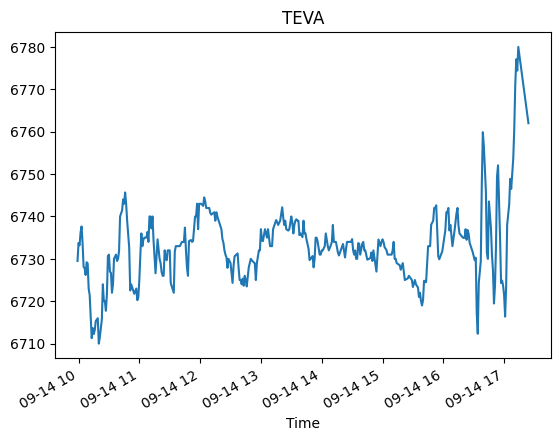

In [14]:
df.groupby('Time').mean()['Last Rate'].plot(title='TEVA')